Протестирую полученные мной модели на своих данных

In [1]:
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline

from keras import layers, models, optimizers
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model

/Users/lera/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
model_resnet = load_model('cats_and_dogs_resnet50_3.hdf5')

In [3]:
model_vgg16 = load_model('cats_and_dogs_vgg16_2.hdf5')

In [4]:
test_files = glob('../my_pets/test/*.JPG')

In [5]:
IMG_SIZE_VGG = (224, 224) 

In [6]:
def load_image(path, target_size = IMG_SIZE_VGG):
    img = load_img(path, target_size=target_size)  # загрузка и масштабирование изображения
    array = img_to_array(img)
    return preprocess_input(array)

In [7]:
def predict_generator(files):
    while True:
        for path in files:
            yield np.array([load_image(path)])

In [11]:
pred_resnet50 = model_resnet.predict_generator(predict_generator(test_files), len(test_files), max_queue_size=500)

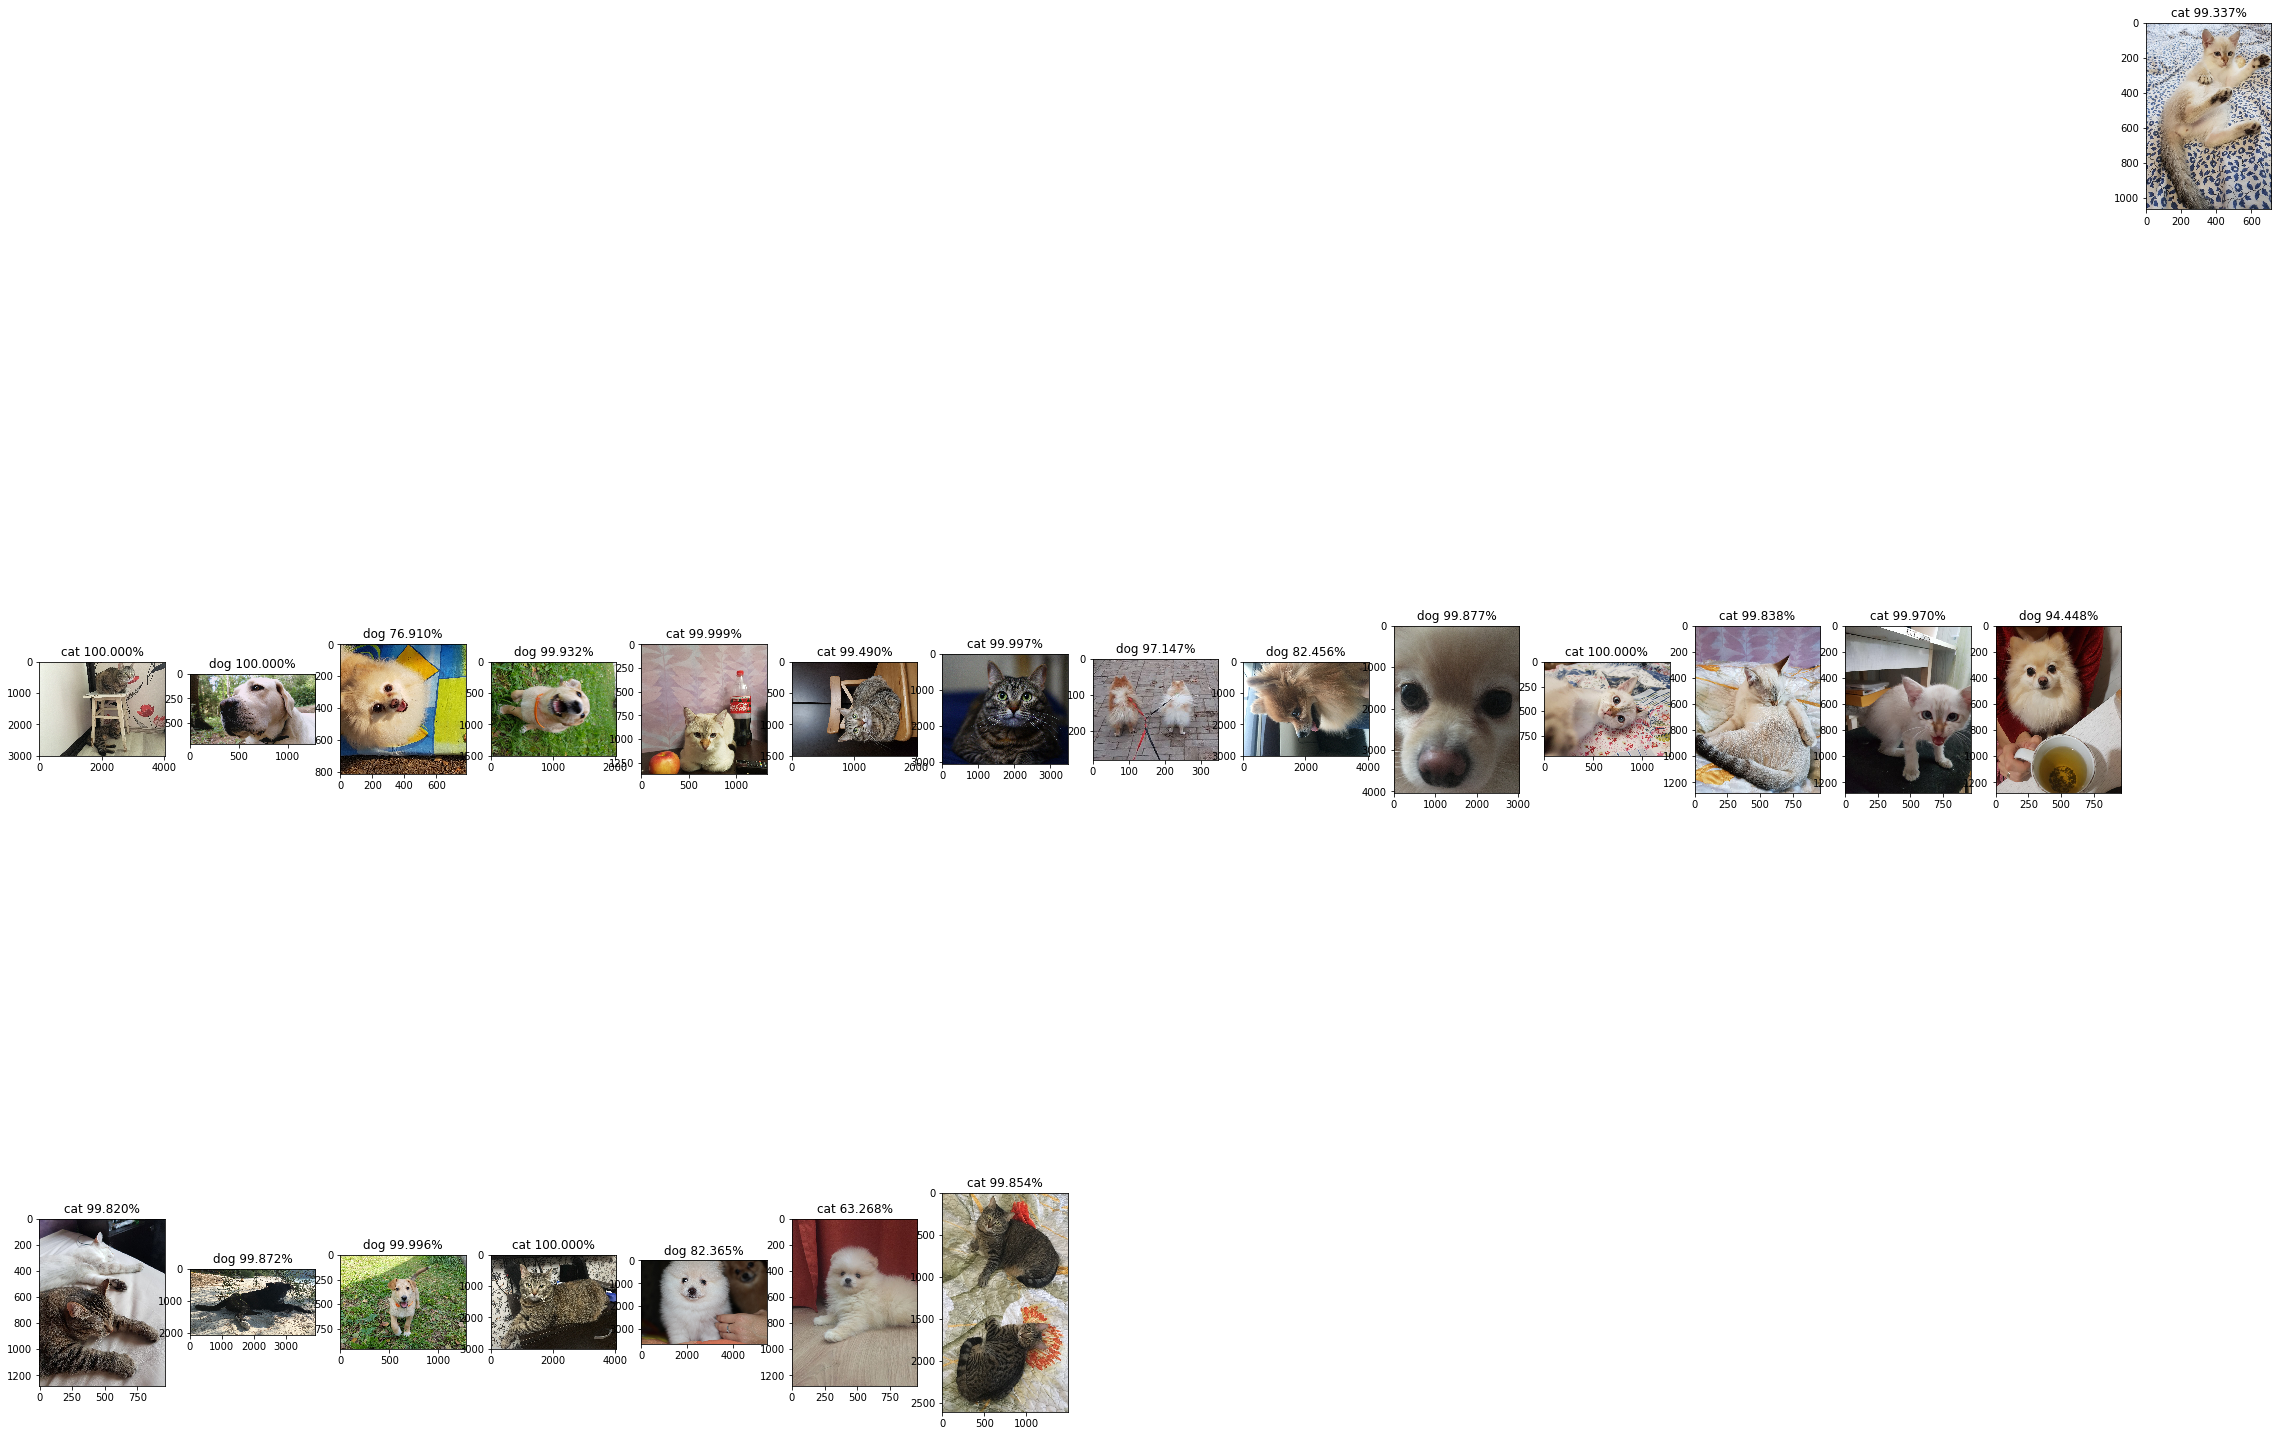

In [12]:
fig = plt.figure(figsize=(40, 40))
for i, (path, score) in enumerate(zip(test_files[:][:], pred_resnet50[:][:]), 1):
    subplot = fig.add_subplot(i // 15 + 1, 15, i)
    if score < 0.5:
        plt.title('cat %.3f%%' % (100 - score * 100))
    else:
        plt.title('dog %.3f%%' % (score * 100))
    plt.imshow(plt.imread(path));

In [13]:
pred_vgg16 = model_vgg16.predict_generator(predict_generator(test_files), len(test_files), max_queue_size=500)

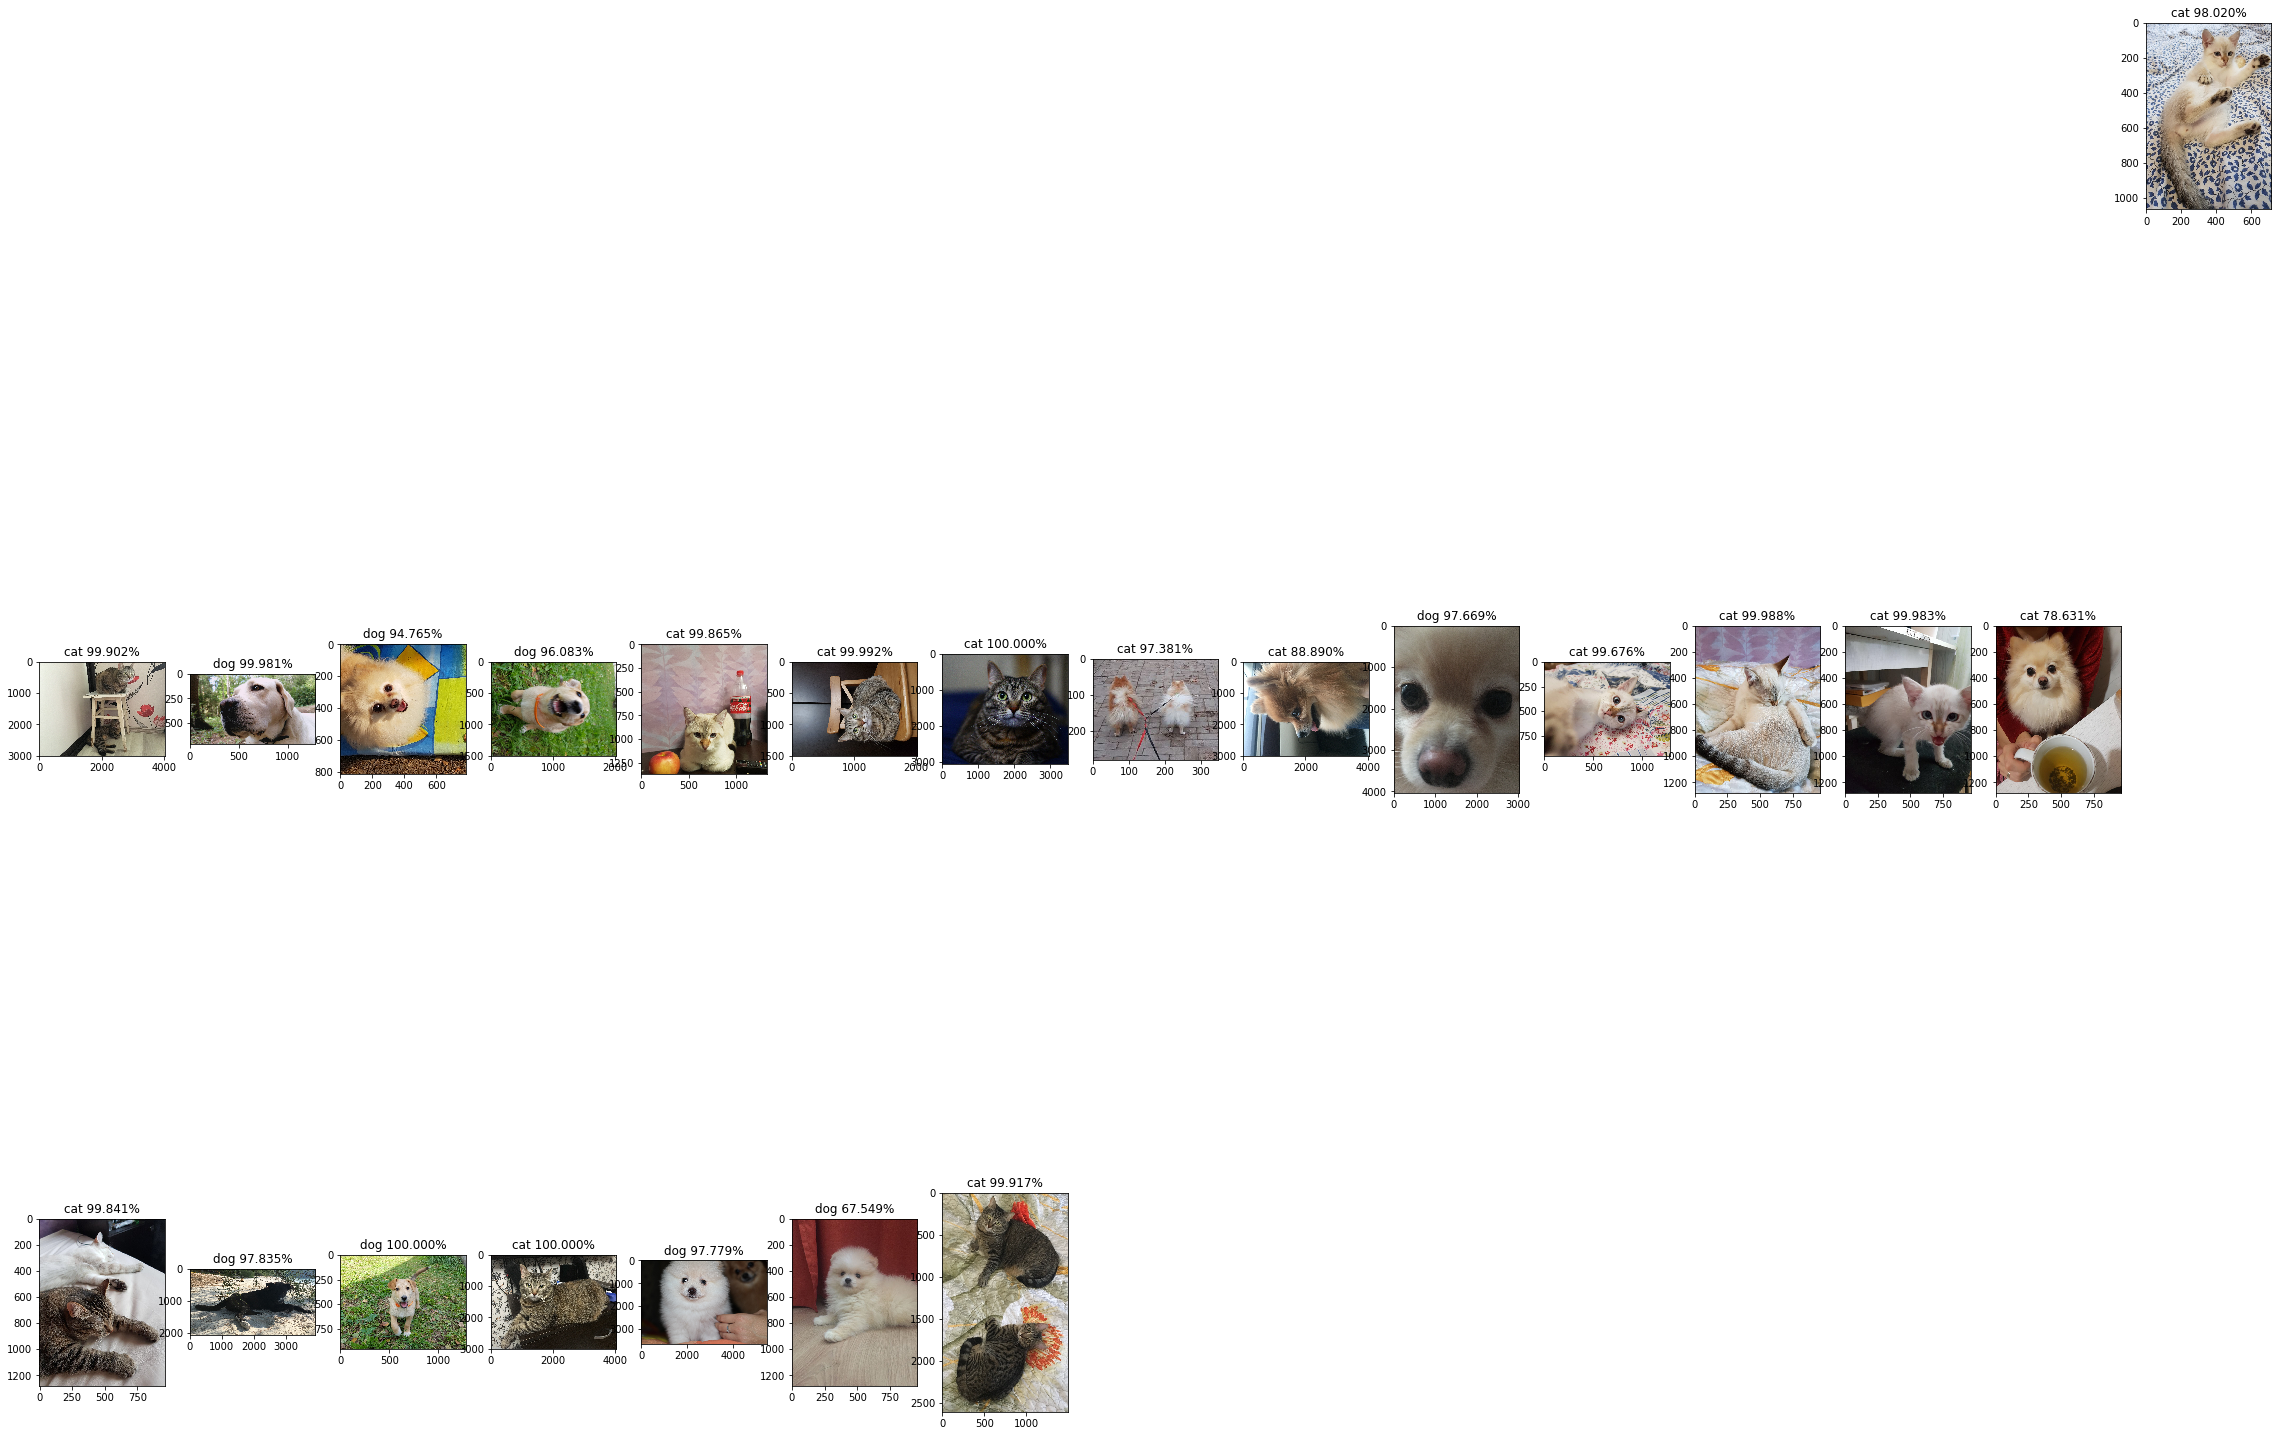

In [14]:
fig = plt.figure(figsize=(40, 40))
for i, (path, score) in enumerate(zip(test_files[:][:], pred_vgg16[:][:]), 1):
    subplot = fig.add_subplot(i // 15 + 1, 15, i)
    if score < 0.5:
        plt.title('cat %.3f%%' % (100 - score * 100))
    else:
        plt.title('dog %.3f%%' % (score * 100))
    plt.imshow(plt.imread(path));

Сеть на основе Resnet50 дала лучший результат, ошиблась всего один раз на шпице. А на основе vgg16 3 раза причислила шпицев к кошкам. Можно попробовать дополнить train дополнительными картинками шпицев